#### 第一版，完全不知道为什么回发生这种情况

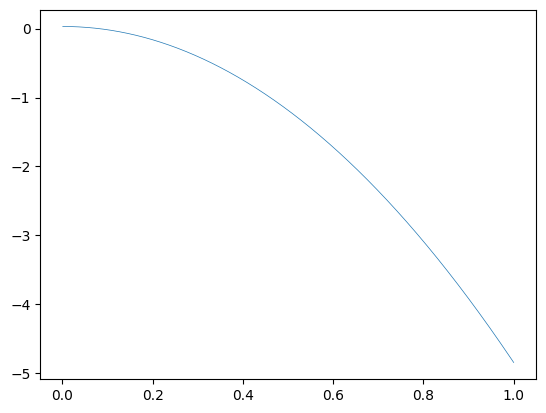

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def log(x):
    return np.log(x)

def atan(x):
    return np.arctan(x)

pi = 3.1415926535

g = 9.7887

V = pi * (1.5 ** 2) * 0.5 * 1e-6
V_2= pi * (0.5 ** 2) * 0.5 * 1e-6

rho = 7.55 * 1e3

m = rho * V

sigma = 57142857

m_left = 0.45

m_1 = m_left * V
m_2 = m_left * V_2


mu_0 = 4 * pi * 1e-7

D = 0.01
H = 0.0175
R = 0.05
h0 = 0.014

dt = 0.001
t_max = 1

steps = int(t_max / dt)

z = [0] * steps
z1 = [0] * steps
z2 = [0] * steps

z[0] = H + h0

for i in range(steps - 1):
    h = z[i] - H
    F1 = (5 / (6 * (R ** 2))) * (1 / h - 1 / (h + D))
    F2 = (1 / (6 * (R ** 3))) * (atan((h / R)) - atan((h + D) / R))
    F3 = (log(1 + ((R ** 2) / (h ** 2)))) / (6 * (h ** 3)) - (log(1 + (R ** 2 / (h + D) ** 2))) / (6 * ((h + D) ** 3))
    F4 = -5 / (18 * (h ** 3)) + 5 / (18 * ((h + D) ** 3))
    F_l = ((9 * sigma * z1[i] * (mu_0 ** 2) * (m_2 ** 2)) / (8 * pi)) * (F1 + F2 + F3 + F4)
    F_m = (3 * mu_0 * m_1 * m_2) / (2 * pi * (z[i] ** 4))
    z2[i] = -g + F_m / m + F_l / m
    z1[i + 1] = z1[i] + dt * z2[i]
    z[i + 1] = z[i] + dt * z1[i]

t = [0] * steps
for i in range(steps):
    t[i] = (i + 1) * dt

ypoints = np.array(z)
xpoints = np.array(t)

name = '/Users/gansz/Downloads/CUPT2024/PythonAnalysis/plots/plot_1.png'

plt.plot(xpoints, ypoints, lw='0.5')
plt.savefig(name, dpi=320)

plt.show()
